# Classificador com Decision tree em Python

 Inspiradas na maneira como os humanos tomam decisões, essas estruturas hierárquicas permitem particionar dados em conjuntos menores com base em regras bem definidas, gerando modelos preditivos eficientes seja para classificação quanto para regressão.

In [1]:
# bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# carregando dados
df = pd.read_csv('/content/Credit.csv')

In [3]:
# dimensoes
df.shape

(1000, 21)

In [10]:
# atributos
df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [4]:
# tipo de dados
df.dtypes

,0
checking_status,object
duration,int64
credit_history,object
purpose,object
credit_amount,int64
savings_status,object
employment,object
installment_commitment,int64
personal_status,object
other_parties,object


In [5]:
# primeiras linhas
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [6]:
# ultimas linhas
df.tail()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
995,'no checking',12,'existing paid',furniture/equipment,1736,<100,4<=X<7,3,'female div/dep/mar',none,...,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,<0,30,'existing paid','used car',3857,<100,1<=X<4,4,'male div/sep',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,'existing paid',radio/tv,1845,<100,1<=X<4,4,'male single',none,...,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad
999,0<=X<200,45,'critical/other existing credit','used car',4576,100<=X<500,unemployed,3,'male single',none,...,car,27,none,own,1,skilled,1,none,yes,good


In [7]:
# informaçoes gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [8]:
# conferindo nulos
df.isnull().sum()

,0
checking_status,0
duration,0
credit_history,0
purpose,0
credit_amount,0
savings_status,0
employment,0
installment_commitment,0
personal_status,0
other_parties,0


In [9]:
# analise descritiva
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


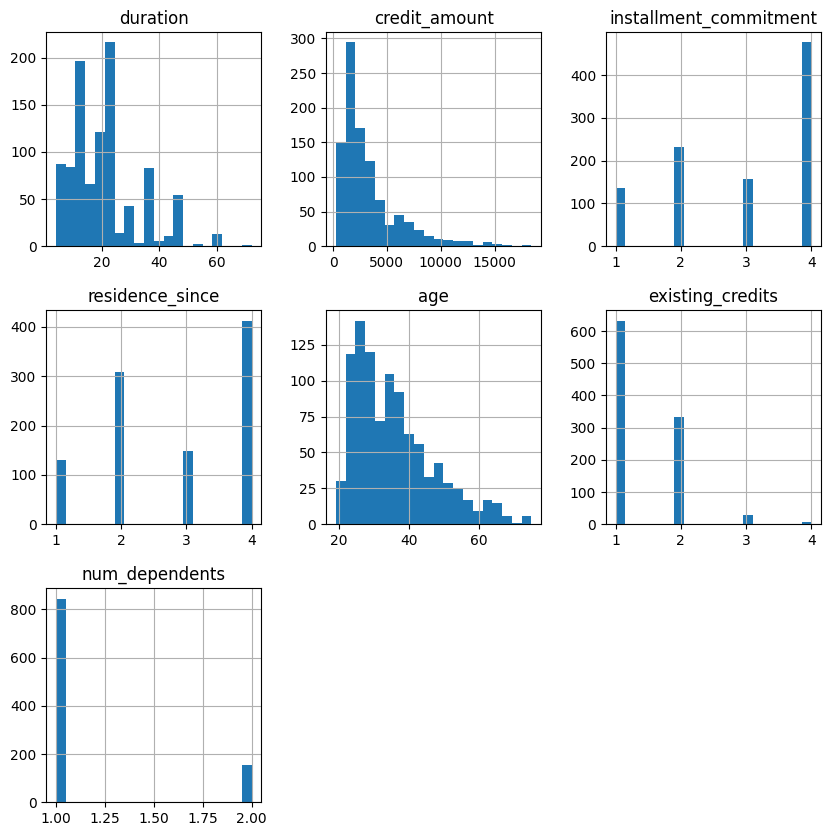

In [12]:
# normalidade
df.select_dtypes(exclude=['object']).hist(figsize=(10,10), bins=20);

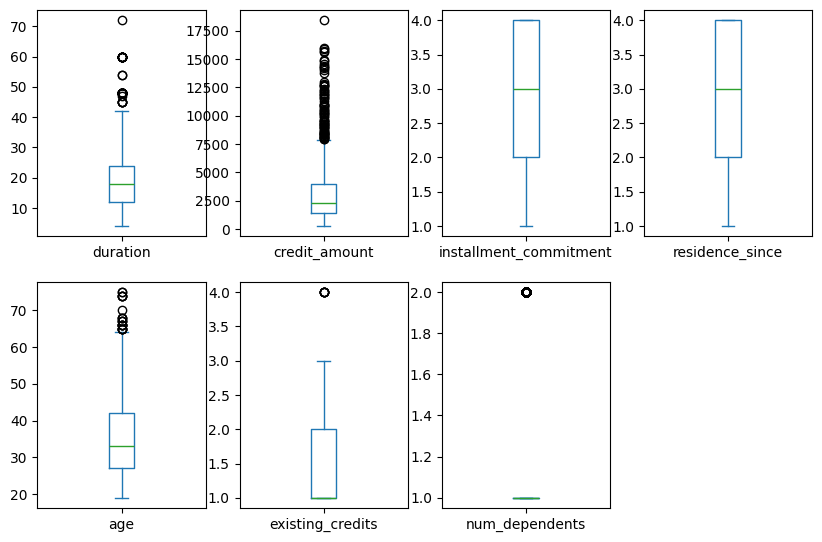

In [17]:
# avaliando outliers
df.select_dtypes(exclude=['object']).plot(kind='box', subplots=True, layout=(3,4), figsize=(10,10));

In [22]:
# atributo alvo
df['class'].value_counts()

,count
class,
good,700
bad,300


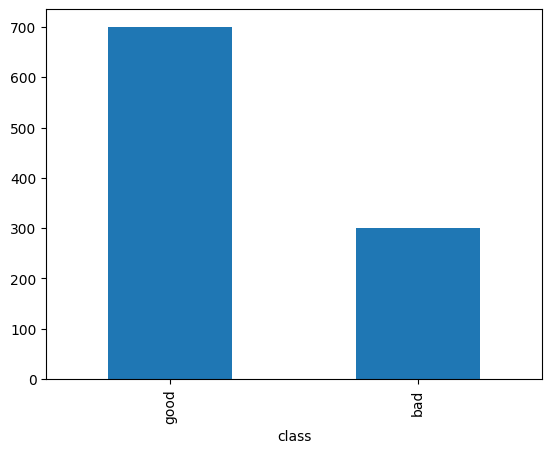

In [23]:
# plot
df['class'].value_counts().plot(kind='bar');

## pre processamento e modelagem

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')


In [26]:
# dependentes e independentes
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# dimensoes
X.shape, y.shape

((1000, 20), (1000,))

In [27]:
# idendificando atributos categoricos e numericos
categoricas = X.select_dtypes(include=['object']).columns
numericas = X.select_dtypes(include=['int64', 'float64']).columns

categoricas, numericas

(Index(['checking_status', 'credit_history', 'purpose', 'savings_status',
        'employment', 'personal_status', 'other_parties', 'property_magnitude',
        'other_payment_plans', 'housing', 'job', 'own_telephone',
        'foreign_worker'],
       dtype='object'),
 Index(['duration', 'credit_amount', 'installment_commitment',
        'residence_since', 'age', 'existing_credits', 'num_dependents'],
       dtype='object'))

In [31]:
# transformando atributos
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categoricas),
    ('scaler', StandardScaler(), numericas)
])

In [32]:
# aplicacao preprocessor e divisao treino/teste
X_transformed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

# dimensoes das bases
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 61), (300, 61), (700,), (300,))

In [73]:
# treinando modelo
model = DecisionTreeClassifier(random_state=42, max_depth=3, min_samples_split=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=3, random_state=42)

In [74]:
# previsoes
y_pred = model.predict(X_test)

## Métricas e avaliações

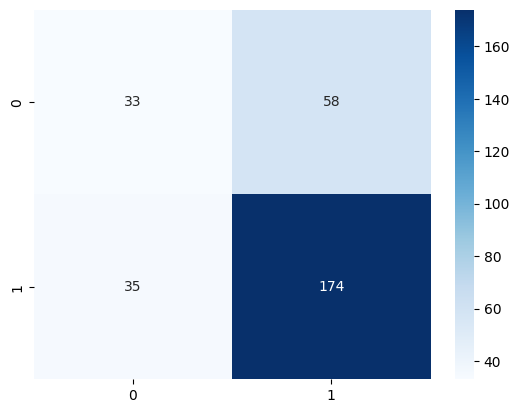

In [75]:
# matriz
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues');

In [76]:
# metricas
acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred, pos_label='good')
recall = recall_score(y_test, y_pred, pos_label='good')
f1 = f1_score(y_test, y_pred, pos_label='good')

print(f'''
  Acurácia: {acuracia:.2f}
  Precisao: {precisao:.2f}
  Recall: {recall:.2f}
  F1: {f1:.2f}
      ''')



  Acurácia: 0.69
  Precisao: 0.75
  Recall: 0.83
  F1: 0.79
      
